In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
import os
import pandas as pd

# Define the folder where the data files are located
folder_path = "../dataset/price/preprocessed"

# Define the time period
start_date = "2014-01-01"
end_date = "2016-01-01"

# Define the split date for training and testing
split_date = "2015-10-01"

# Initialize dictionaries to store training and testing data for each company
company_data_train = {}
company_data_test = {}

# Loop through all files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".txt"):  # Ensure it's a data file
        company_name = file_name.split(".")[0]  # Extract company name
        file_path = os.path.join(folder_path, file_name)
        
        # Load the data
        df = pd.read_csv(file_path, sep="\t", header=None)
        df.columns = ["date", "movement_percent", "open_price", "high_price", "low_price", "close_price", "volume"]
        df["date"] = pd.to_datetime(df["date"])  # Convert date to datetime
        
        # Filter data based on the date range
        filtered_df = df[(df["date"] >= start_date) & (df["date"] <= end_date)]
        
        # Split into training and testing data
        train_df = filtered_df[filtered_df["date"] < split_date]
        test_df = filtered_df[filtered_df["date"] >= split_date]
        
        # Store the split data in respective dictionaries
        company_data_train[company_name] = train_df
        company_data_test[company_name] = test_df

# Now `company_data_train` contains training data and `company_data_test` contains testing data for each company


In [3]:
company_data_train["AAPL"]

,date,movement_percent,open_price,high_price,low_price,close_price,volume
485,2015-09-30,0.011370,0.049976,0.063033,0.036252,1.193001,66473000.0
486,2015-09-29,-0.030060,0.043003,0.049289,-0.002940,-3.251884,73365400.0
487,2015-09-28,-0.019789,0.031605,0.038129,0.018829,-2.183953,52109000.0
488,2015-09-25,-0.002522,0.052413,0.054672,0.030540,-0.279007,56151900.0
489,2015-09-24,0.005948,0.029669,0.050126,0.021668,0.654221,50219500.0
...,...,...,...,...,...,...,...
920,2014-01-08,0.006333,0.072305,0.085738,0.072066,0.454582,64632400.0
921,2014-01-07,-0.007151,0.075524,0.078764,0.062878,-0.517036,79302300.0
922,2014-01-06,0.005453,0.067740,0.086315,0.060091,0.392089,103152700.0
923,2014-01-03,-0.021966,0.074229,0.075861,0.050077,-1.614975,98116900.0


In [4]:
company_data_test["AAPL"]

,date,movement_percent,open_price,high_price,low_price,close_price,volume
421,2015-12-31,-0.019195,0.031978,0.032171,0.010858,-1.990410,40635300.0
422,2015-12-30,-0.013059,0.033445,0.034587,0.020120,-1.372009,25213800.0
423,2015-12-29,0.017974,0.036324,0.060255,0.035355,1.855117,30931200.0
424,2015-12-28,-0.011201,0.030752,0.031710,0.017244,-1.169113,26704200.0
425,2015-12-24,-0.005340,0.038684,0.038684,0.028678,-0.560394,13570400.0
...,...,...,...,...,...,...,...
480,2015-10-07,-0.004761,0.043413,0.043693,0.021656,-0.509903,46765600.0
481,2015-10-06,0.004784,0.037990,0.048405,0.029921,0.509903,48196800.0
482,2015-10-05,0.003624,0.034689,0.048720,0.027062,0.384842,52064700.0
483,2015-10-02,0.007301,0.024506,0.052961,0.020142,0.769676,58019800.0


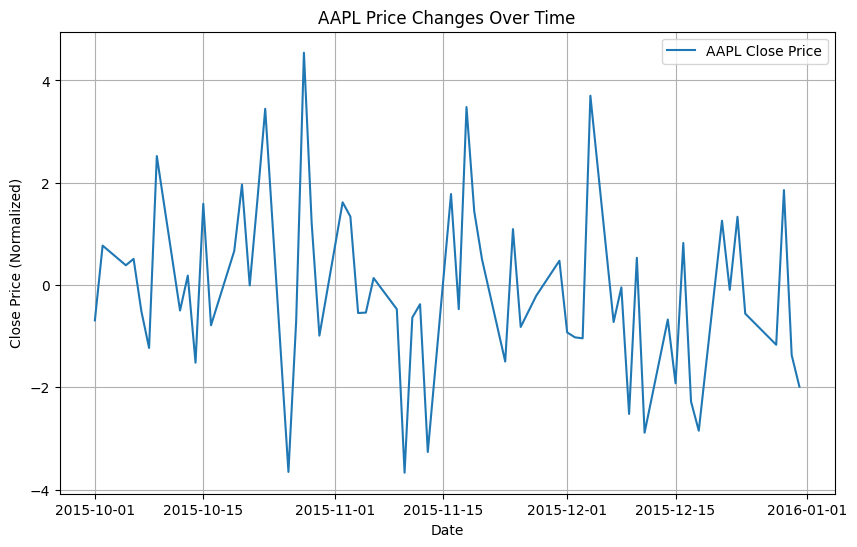

In [3]:
import matplotlib.pyplot as plt

def plot_price_changes(company_name, data_dict):
    if company_name in data_dict:
        company_data = data_dict[company_name]
        
        plt.figure(figsize=(10, 6))
        plt.plot(company_data["date"], company_data["close_price"], label=f"{company_name} Close Price")
        plt.title(f"{company_name} Price Changes Over Time")
        plt.xlabel("Date")
        plt.ylabel("Close Price (Normalized)")
        plt.grid()
        plt.legend()
        plt.show()
    else:
        print(f"Company {company_name} not found in the data dictionary.")

plot_price_changes("AAPL", company_data_test)


In [4]:
def create_sequences(data, features, sequence_length=5):
    """
    Creates sequences of 5 consecutive rows for features and uses the next row for the target.

    Parameters:
        data (DataFrame): The dataset with features and target.
        features (list): List of column names to use as features.
        sequence_length (int): Number of rows in each sequence.

    Returns:
        X (numpy array): Input sequences of shape (samples, sequence_length, features).
        y (numpy array): Corresponding target labels.
    """
    X, y = [], []

    for i in range(len(data) - sequence_length):
        # Extract the sequence of 5 rows
        X.append(data[features].iloc[i:i+sequence_length].values)
        # Use the 6th row's target
        y.append(data["target"].iloc[i + sequence_length])
    
    return np.array(X), np.array(y)


In [5]:
# Define a function to generate sequences for all companies
def create_sequences_for_all(data_dict, features, sequence_length=5):
    """
    Generates sequences for all companies in the given data dictionary.

    Parameters:
        data_dict (dict): Dictionary containing dataframes for multiple companies.
        features (list): List of column names to use as features.
        sequence_length (int): Number of rows in each sequence.

    Returns:
        X_dict (dict): Dictionary of input sequences for each company.
        y_dict (dict): Dictionary of target labels for each company.
    """
    X_dict, y_dict = {}, {}

    for company, data in data_dict.items():
        # Create the target column for the company
        data["target"] = (data["open_price"] < data["close_price"]).astype(int)
        
        # Generate sequences for the company
        X, y = create_sequences(data, features, sequence_length)
        
        # Store in the respective dictionaries
        X_dict[company] = X
        y_dict[company] = y

    return X_dict, y_dict

# Define features for the input
features = ["movement_percent", "open_price", "high_price", "low_price", "close_price", "volume"]

# Generate sequences for training and testing data for all companies
X_train_dict, y_train_dict = create_sequences_for_all(company_data_train, features)
X_test_dict, y_test_dict = create_sequences_for_all(company_data_test, features)




C:\Users\Otto9\AppData\Local\Temp\ipykernel_2484\488495222.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["target"] = (data["open_price"] < data["close_price"]).astype(int)
C:\Users\Otto9\AppData\Local\Temp\ipykernel_2484\488495222.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["target"] = (data["open_price"] < data["close_price"]).astype(int)


In [6]:
# Example: Print shapes for a specific company
company = "PM"
print(f"Train Input shape ({company}): {X_train_dict[company].shape}, Target shape: {y_train_dict[company].shape}")
print(f"Test Input shape ({company}): {X_test_dict[company].shape}, Target shape: {y_test_dict[company].shape}")

Train Input shape (PM): (435, 5, 6), Target shape: (435,)
Test Input shape (PM): (59, 5, 6), Target shape: (59,)


In [7]:
# Loop through each company and check if the shape is not [n, 5, 6] for train and test
for company in X_train_dict.keys():
    X_train = X_train_dict[company]
    y_train = y_train_dict[company]
    X_test = X_test_dict[company]
    y_test = y_test_dict[company]

    if len(X_train.shape) != 3 or X_train.shape[1:] != (5, 6):
        print(f"Company: {company} - Train Input shape issue: {X_train.shape}")
    if len(X_test.shape) != 3 or X_test.shape[1:] != (5, 6):
        print(f"Company: {company} - Test Input shape issue: {X_test.shape}")


Company: GMRE - Train Input shape issue: (0,)
Company: GMRE - Test Input shape issue: (0,)


In [8]:
X_train_dict.pop("GMRE")
X_test_dict.pop("GMRE")

array([], dtype=float64)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

In [10]:
model = Sequential([
    SimpleRNN(32, activation='relu', input_shape=(5, 6)),  # RNN layer with 32 units
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

c:\Users\Otto9\Skrivebord\stocknet-project-ikt450\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
from tqdm import tqdm

# Initialize a dictionary to store results for each company
results = {}

# Train the model for each company in the training dictionary
for company in tqdm(X_train_dict.keys(), desc="Training and Evaluating Companies"):
    # Get the training and testing data for the current company
    X_train = X_train_dict[company]
    y_train = y_train_dict[company]
    X_test = X_test_dict[company]
    y_test = y_test_dict[company]

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0, verbose=0)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Store the results
    results[company] = {"loss": loss, "accuracy": accuracy}

    # Print progress for the current company
    #print(f"{company}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}")

# Print final results
#print("\nFinal Results:")
#for company, metrics in results.items():
    #print(f"{company}: Loss = {metrics['loss']:.4f}, Accuracy = {metrics['accuracy']:.4f}")


Training and Evaluating Companies: 100%|██████████| 87/87 [01:08<00:00,  1.28it/s]


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


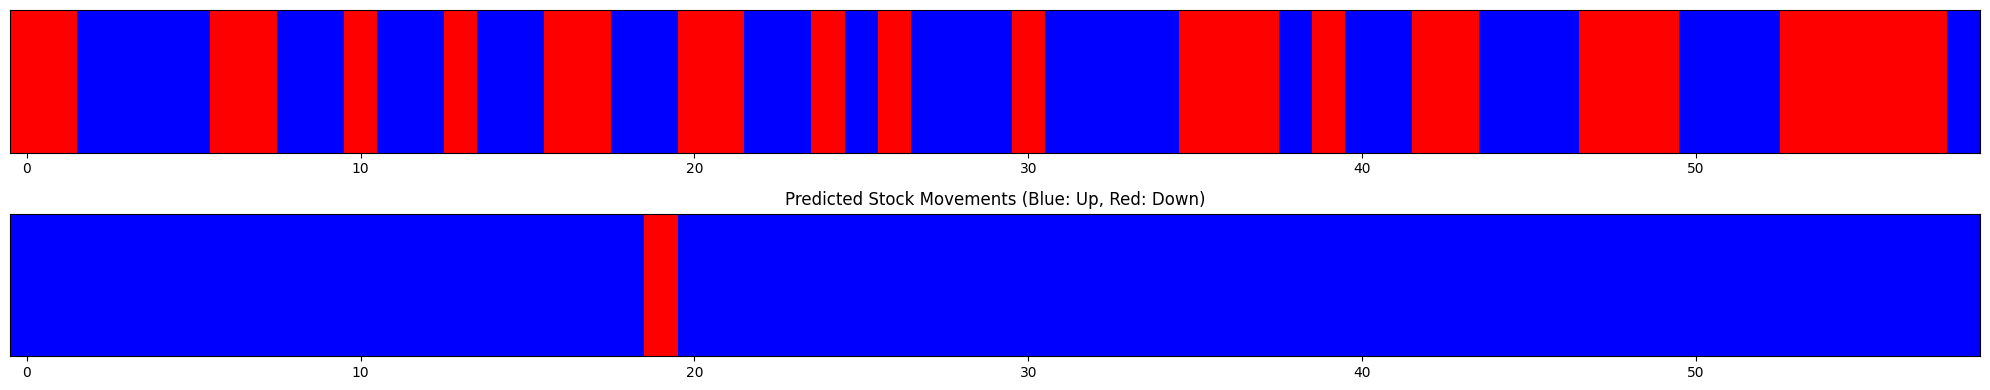

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a grid visualization of the original data
def plot_stock_movements(data, predictions=None):
    """
    Visualize stock movements with a straight-line grid.
    Blue for increase, Red for decrease.

    Parameters:
        data (array): The actual stock movement labels (1 for up, 0 for down).
        predictions (array): Model's predicted stock movement (optional).
    """
    num_days = len(data)
    fig, axes = plt.subplots(2 if predictions is not None else 1, 1, figsize=(20, 4))

    # Actual movements
    ax = axes[0] if predictions is not None else axes
    ax.imshow(data.reshape(1, -1), cmap="bwr", aspect="auto", interpolation="none")
    #ax.set_title("Actual Stock Movements (Blue: Up, Red: Down)")
    ax.set_yticks([])
    #ax.set_xticks(np.arange(num_days))
    #ax.set_xticklabels([f"Day {i+1}" for i in range(num_days)], rotation=90)

    # Predicted movements (if provided)
    if predictions is not None:
        ax_pred = axes[1]
        ax_pred.imshow(predictions.reshape(1, -1), cmap="bwr", aspect="auto", interpolation="none")
        ax_pred.set_title("Predicted Stock Movements (Blue: Up, Red: Down)")
        ax_pred.set_yticks([])
        #ax_pred.set_xticks(np.arange(num_days))
        #ax_pred.set_xticklabels([f"Day {i+1}" for i in range(num_days)], rotation=90)

    plt.tight_layout()
    plt.show()

# Use the model to predict the entire dataset
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Visualize actual and predicted movements
plot_stock_movements(y_test, predicted_classes)


Accuracy: 52.54% (31/59 correct)


C:\Users\Otto9\AppData\Local\Temp\ipykernel_22120\1558021621.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"Day {i+1}" for i in range(num_days)], rotation=90)


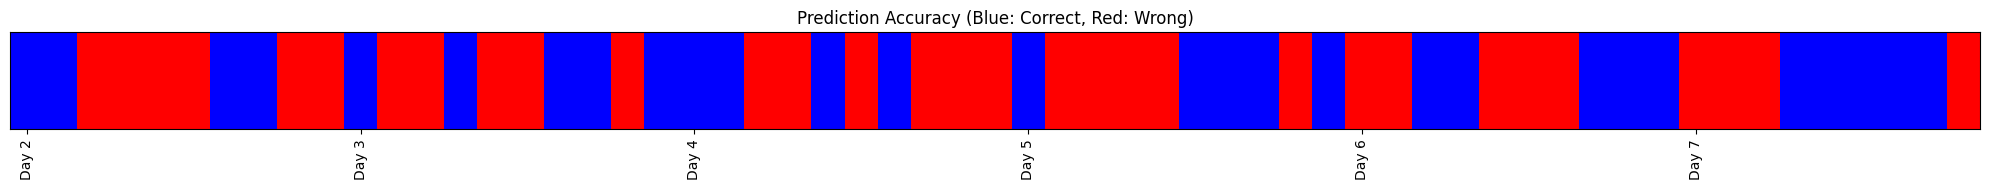

In [14]:
def plot_comparison_with_accuracy(actual, predictions):
    """
    Visualize comparison between actual and predicted stock movements.
    Blue if the prediction is correct, Red if it's wrong.
    Prints the percentage of correctly identified cases.

    Parameters:
        actual (array): The actual stock movement labels (1 for up, 0 for down).
        predictions (array): Model's predicted stock movement.
    """
    # Calculate correctness
    comparison = (actual == predictions).astype(int)  # 1 if correct, 0 if wrong
    accuracy = np.mean(comparison) * 100  # Calculate accuracy percentage

    # Print accuracy
    print(f"Accuracy: {accuracy:.2f}% ({np.sum(comparison)}/{len(actual)} correct)")

    # Create the grid visualization
    num_days = len(actual)
    fig, ax = plt.subplots(figsize=(20, 2))
    ax.imshow(comparison.reshape(1, -1), cmap="bwr", aspect="auto", interpolation="none")
    ax.set_title("Prediction Accuracy (Blue: Correct, Red: Wrong)")
    ax.set_yticks([])
    #ax.set_xticks(np.arange(num_days))
    ax.set_xticklabels([f"Day {i+1}" for i in range(num_days)], rotation=90)

    plt.tight_layout()
    plt.show()

# Visualize comparison and print accuracy
plot_comparison_with_accuracy(y_test, predicted_classes)


In [ ]:
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report

# Initialize a dictionary to store results for each company
results = {}

# Function to calculate and display metrics
def calculate_metrics_for_company(company, actual, predictions):
    """
    Calculate and display metrics for a specific company's test data.

    Parameters:
        company (str): Name of the company.
        actual (array): Actual stock movement labels (1 for up, 0 for down).
        predictions (array): Model's predicted stock movement.
    """
    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(actual, predictions).ravel()

    # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Store metrics in the results dictionary
    results[company] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score,
        "confusion_matrix": (tp, tn, fp, fn),
    }

    # Print metrics for the company
    #print(f"Metrics for {company}:")
    #print(f"  TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")
    #print(f"  Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1_score:.2f}\n")


# Loop through all companies in the test set and calculate metrics
for company in tqdm(X_test_dict.keys(), desc="Evaluating Companies"):
    # Get test data for the company
    X_test = X_test_dict[company]
    y_test = y_test_dict[company]

    # Predict using the model
    predictions = model.predict(X_test)
    predicted_classes = (predictions > 0.5).astype(int).flatten()

    # Calculate and display metrics for the company
    calculate_metrics_for_company(company, y_test, predicted_classes)

# Print final summary
print("\nSummary of Metrics for All Companies:")
for company, metrics in results.items():
    print(f"{company}: Accuracy = {metrics['accuracy']:.2f}, Precision = {metrics['precision']:.2f}, Recall = {metrics['recall']:.2f}, F1 Score = {metrics['f1_score']:.2f}")


Evaluating Companies:   0%|          | 0/87 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Evaluating Companies:   2%|▏         | 2/87 [00:00<00:06, 12.41it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


Evaluating Companies:   5%|▍         | 4/87 [00:00<00:06, 13.25it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Evaluating Companies:   7%|▋         | 6/87 [00:00<00:06, 13.28it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Evaluating Companies:   9%|▉         | 8/87 [00:00<00:06, 11.95it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


Evaluating Companies:  11%|█▏        | 10/87 [00:00<00:06, 12.41it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


Evaluating Companies:  14%|█▍        | 12/87 [00:00<00:05, 13.69it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


Evaluating Companies:  16%|█▌        | 14/87 [00:01<00:05, 14.20it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


Evaluating Companies:  18%|█▊        | 16/87 [00:01<00:05, 14.01it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Evaluating Companies:  21%|██        | 18/87 [00:01<00:04, 13.92it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


Evaluating Companies:  23%|██▎       | 20/87 [00:01<00:04, 13.41it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Evaluating Companies:  25%|██▌       | 22/87 [00:01<00:04, 13.28it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Evaluating Companies:  28%|██▊       | 24/87 [00:01<00:04, 12.84it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Evaluating Companies:  30%|██▉       | 26/87 [00:01<00:04, 12.55it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


Evaluating Companies:  32%|███▏      | 28/87 [00:02<00:04, 12.62it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


Evaluating Companies:  34%|███▍      | 30/87 [00:02<00:04, 11.61it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Evaluating Companies:  37%|███▋      | 32/87 [00:02<00:04, 11.70it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Evaluating Companies:  39%|███▉      | 34/87 [00:02<00:04, 12.44it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


Evaluating Companies:  41%|████▏     | 36/87 [00:02<00:03, 12.96it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


Evaluating Companies:  44%|████▎     | 38/87 [00:02<00:03, 13.62it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Evaluating Companies:  46%|████▌     | 40/87 [00:03<00:03, 14.20it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Evaluating Companies:  48%|████▊     | 42/87 [00:03<00:02, 15.28it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


Evaluating Companies:  51%|█████     | 44/87 [00:03<00:02, 15.48it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Evaluating Companies:  53%|█████▎    | 46/87 [00:03<00:02, 15.62it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


Evaluating Companies:  55%|█████▌    | 48/87 [00:03<00:02, 15.60it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Evaluating Companies:  57%|█████▋    | 50/87 [00:03<00:02, 15.81it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Evaluating Companies:  60%|█████▉    | 52/87 [00:03<00:02, 15.51it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


Evaluating Companies:  62%|██████▏   | 54/87 [00:03<00:02, 14.38it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Evaluating Companies:  64%|██████▍   | 56/87 [00:04<00:02, 14.74it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Evaluating Companies:  67%|██████▋   | 58/87 [00:04<00:02, 14.37it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Evaluating Companies:  69%|██████▉   | 60/87 [00:04<00:01, 15.04it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Evaluating Companies:  71%|███████▏  | 62/87 [00:04<00:01, 15.09it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Evaluating Companies:  74%|███████▎  | 64/87 [00:04<00:01, 14.77it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


Evaluating Companies:  76%|███████▌  | 66/87 [00:04<00:01, 13.41it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


Evaluating Companies:  78%|███████▊  | 68/87 [00:04<00:01, 13.69it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Evaluating Companies:  80%|████████  | 70/87 [00:05<00:01, 13.96it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Evaluating Companies:  83%|████████▎ | 72/87 [00:05<00:01, 14.60it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Evaluating Companies:  85%|████████▌ | 74/87 [00:05<00:00, 14.87it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Evaluating Companies:  87%|████████▋ | 76/87 [00:05<00:00, 15.32it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Evaluating Companies:  90%|████████▉ | 78/87 [00:05<00:00, 13.67it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Evaluating Companies:  92%|█████████▏| 80/87 [00:05<00:00, 14.04it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Evaluating Companies:  94%|█████████▍| 82/87 [00:05<00:00, 14.31it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Evaluating Companies:  97%|█████████▋| 84/87 [00:06<00:00, 14.81it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Evaluating Companies:  99%|█████████▉| 86/87 [00:06<00:00, 14.79it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


Evaluating Companies: 100%|██████████| 87/87 [00:06<00:00, 13.99it/s]


Summary of Metrics for All Companies:
AAPL: Accuracy = 0.54, Precision = 0.00, Recall = 0.00, F1 Score = 0.00
ABB: Accuracy = 0.64, Precision = 0.67, Recall = 0.09, F1 Score = 0.16
ABBV: Accuracy = 0.47, Precision = 0.50, Recall = 0.06, F1 Score = 0.11
AEP: Accuracy = 0.46, Precision = 0.00, Recall = 0.00, F1 Score = 0.00
AGFS: Accuracy = 0.49, Precision = 0.23, Recall = 0.13, F1 Score = 0.17
AMGN: Accuracy = 0.42, Precision = 1.00, Recall = 0.03, F1 Score = 0.06
AMZN: Accuracy = 0.44, Precision = 0.67, Recall = 0.06, F1 Score = 0.11
BA: Accuracy = 0.47, Precision = 0.60, Recall = 0.09, F1 Score = 0.16
BABA: Accuracy = 0.46, Precision = 0.50, Recall = 0.09, F1 Score = 0.16
BAC: Accuracy = 0.54, Precision = 0.00, Recall = 0.00, F1 Score = 0.00
BBL: Accuracy = 0.58, Precision = 0.50, Recall = 0.08, F1 Score = 0.14
BCH: Accuracy = 0.66, Precision = 0.80, Recall = 0.17, F1 Score = 0.29
BHP: Accuracy = 0.56, Precision = 0.60, Recall = 0.11, F1 Score = 0.19
BP: Accuracy = 0.64, Precision = 

In [19]:
# Initialize variables to calculate average metrics
total_accuracy, total_precision, total_recall, total_f1 = 0, 0, 0, 0
num_companies = len(results)

# Calculate average metrics
for metrics in results.values():
    total_accuracy += metrics["accuracy"]
    total_precision += metrics["precision"]
    total_recall += metrics["recall"]
    total_f1 += metrics["f1_score"]

average_accuracy = total_accuracy / num_companies
average_precision = total_precision / num_companies
average_recall = total_recall / num_companies
average_f1 = total_f1 / num_companies

# Print summary of metrics
print("\nSummary of Metrics Across All Companies:")
print(f"Average Accuracy: {average_accuracy:.2f}")
print(f"Average Precision: {average_precision:.2f}")
print(f"Average Recall: {average_recall:.2f}")
print(f"Average F1 Score: {average_f1:.2f}")



Summary of Metrics Across All Companies:
Average Accuracy: 0.51
Average Precision: 0.42
Average Recall: 0.06
Average F1 Score: 0.10
